<a href="https://colab.research.google.com/github/courage20/Hello-world/blob/master/Credit_Card_Fraud_Detection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

Importing Dataset And Printing First 10 Rows

In [ ]:
df = pd.read_csv('creditcard.csv')
X = df.iloc[:,: -1].values
y = df.iloc[:,-1].values
print(df.shape)
df.head(10)


(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


Visualising Variables Distribution 

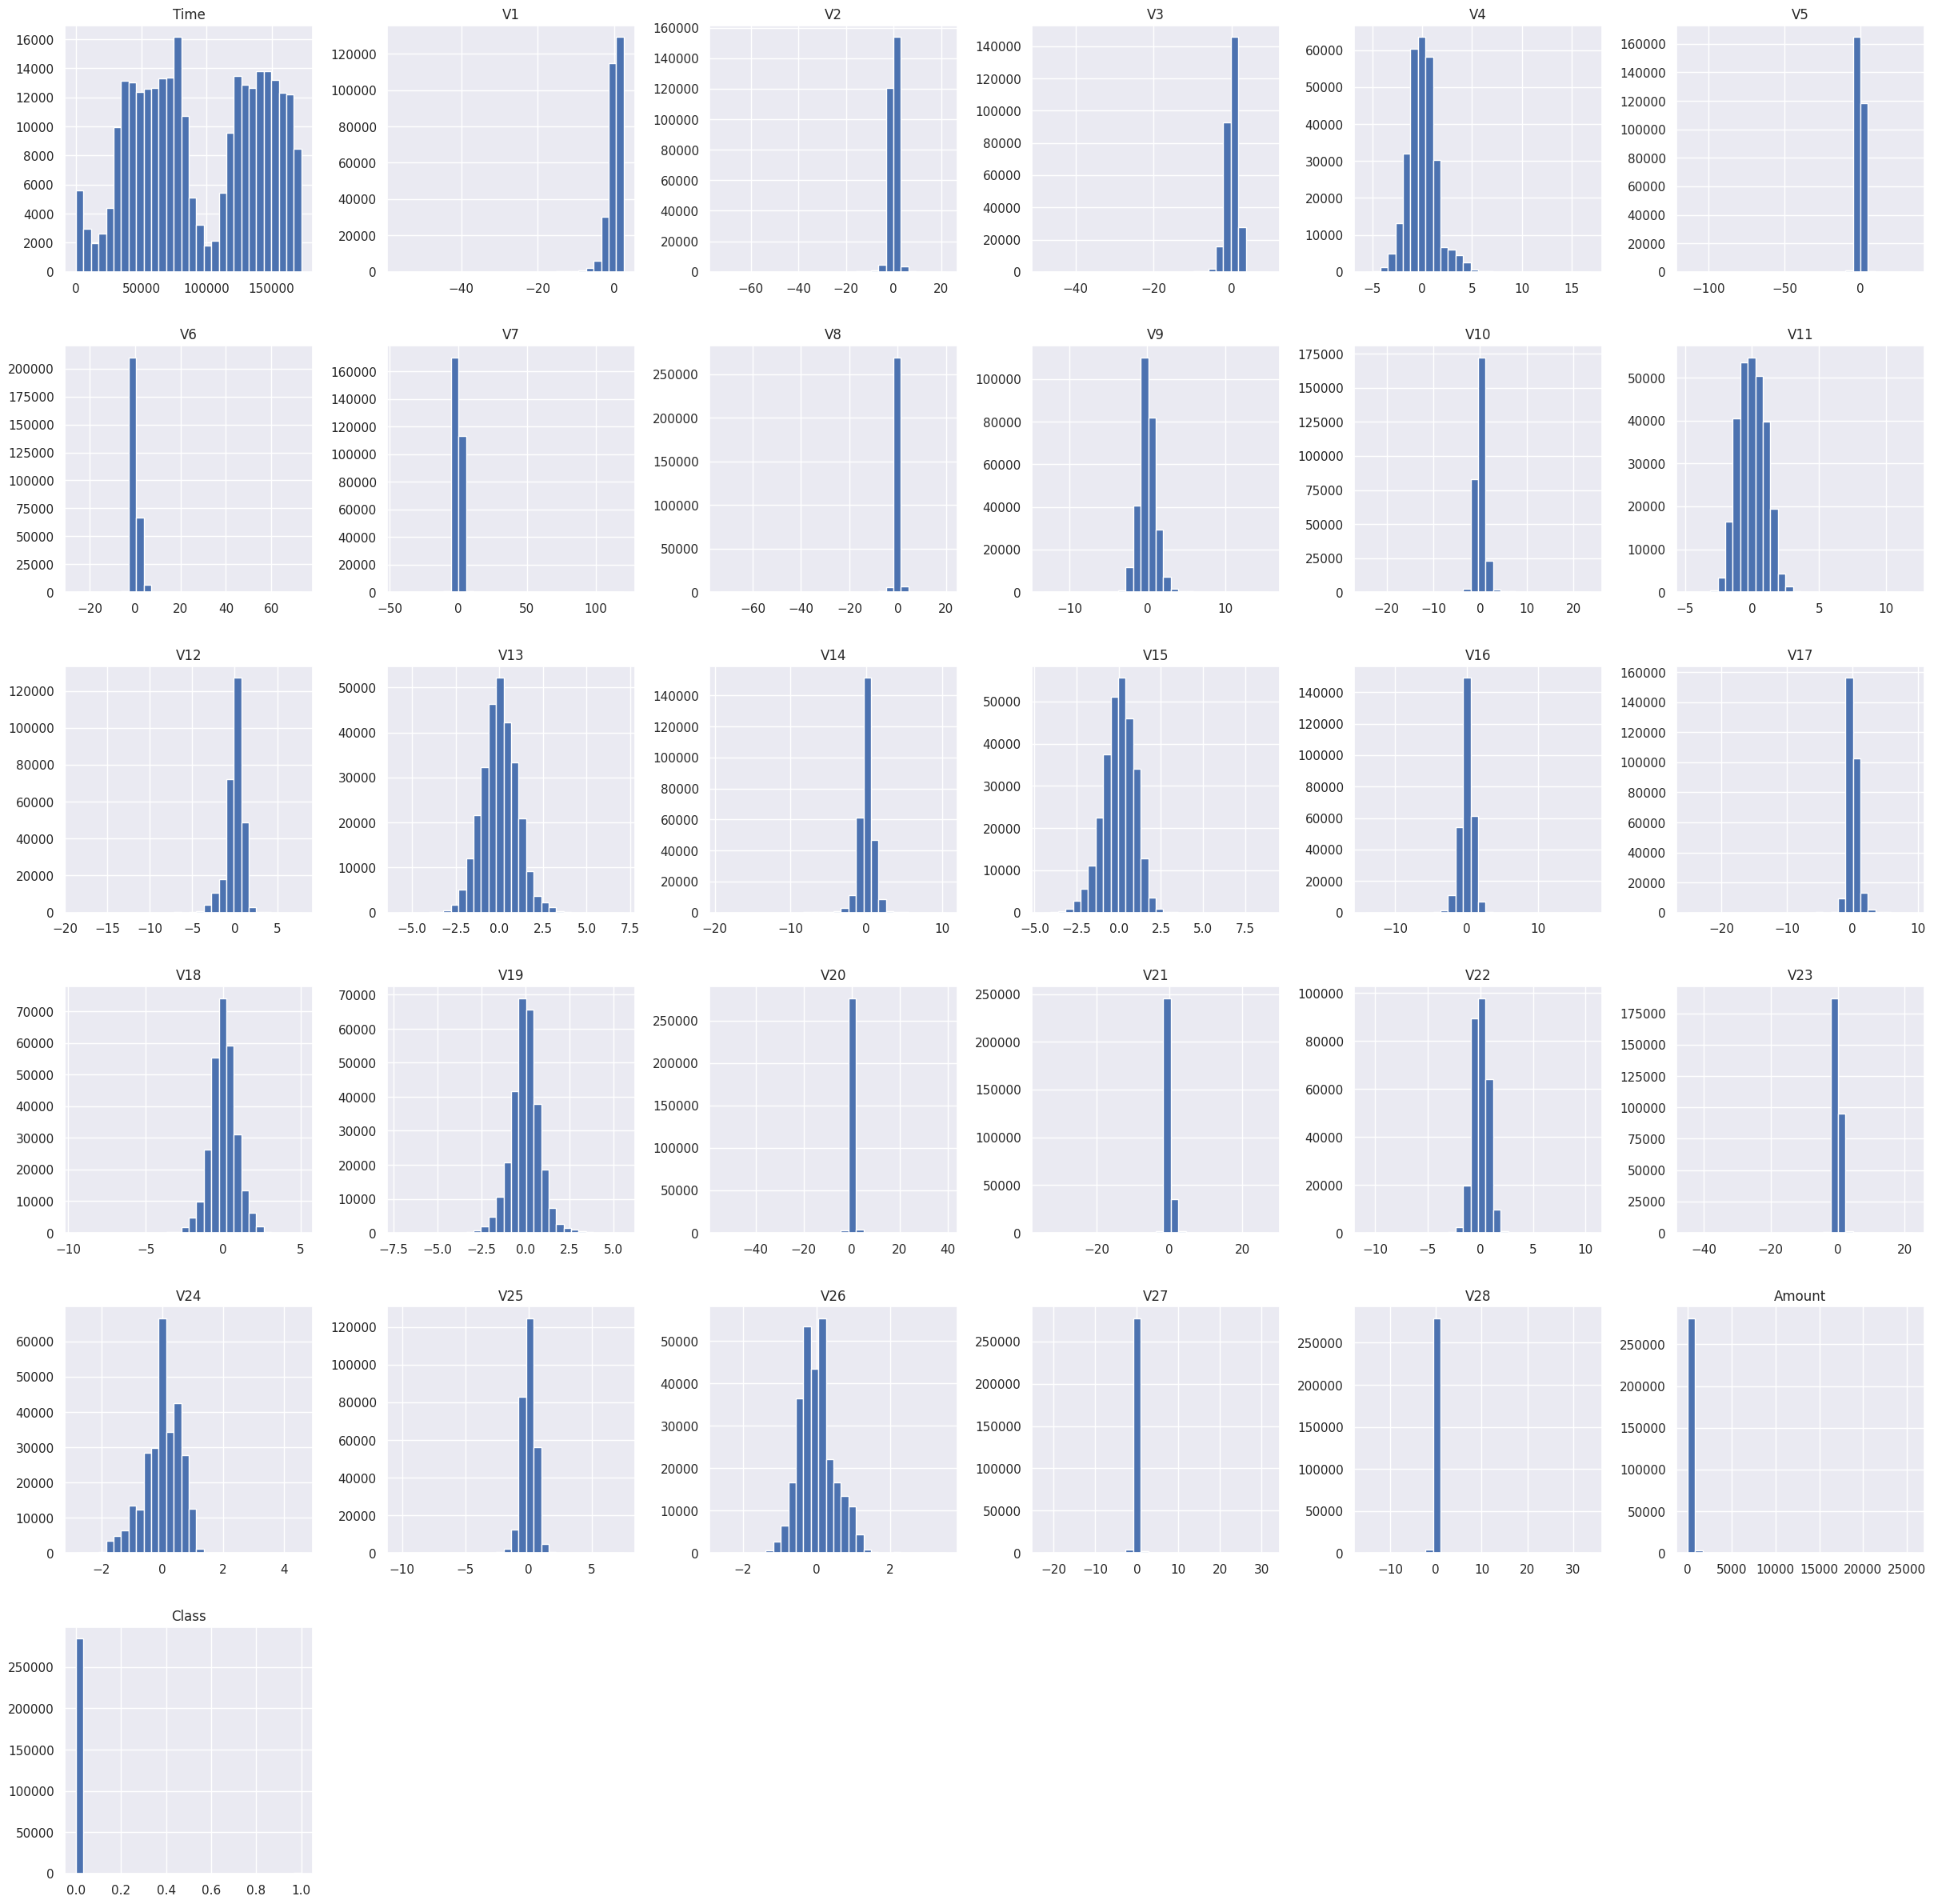

In [ ]:
df.hist(bins=30, figsize=(30, 30));

Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Visualising Heatmap for Missing Values

<Axes: >

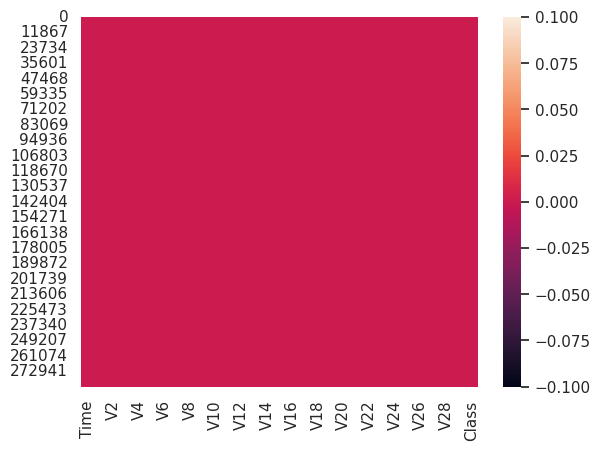

In [ ]:
sns.heatmap(df.isnull())

Data Frame Interpolate

In [ ]:
#df = df.dropna()
df = df.interpolate()

Feature Scaling 

In [ ]:
# Columns Amount and Time scaled
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

Feature Scaling and Renaming Time and Amount

In [ ]:
# Amount and Time are Scaled
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)


df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


Visualising Target Variable after Scaling

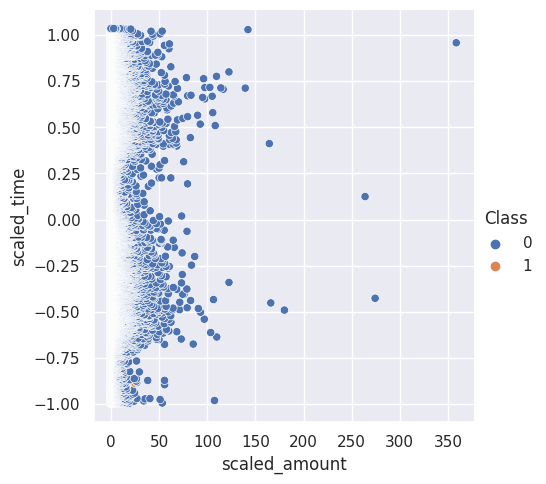

In [ ]:
sns.relplot(x='scaled_amount', y='scaled_time', hue='Class', data=df)

Visualising Variables Distribution after Scaling

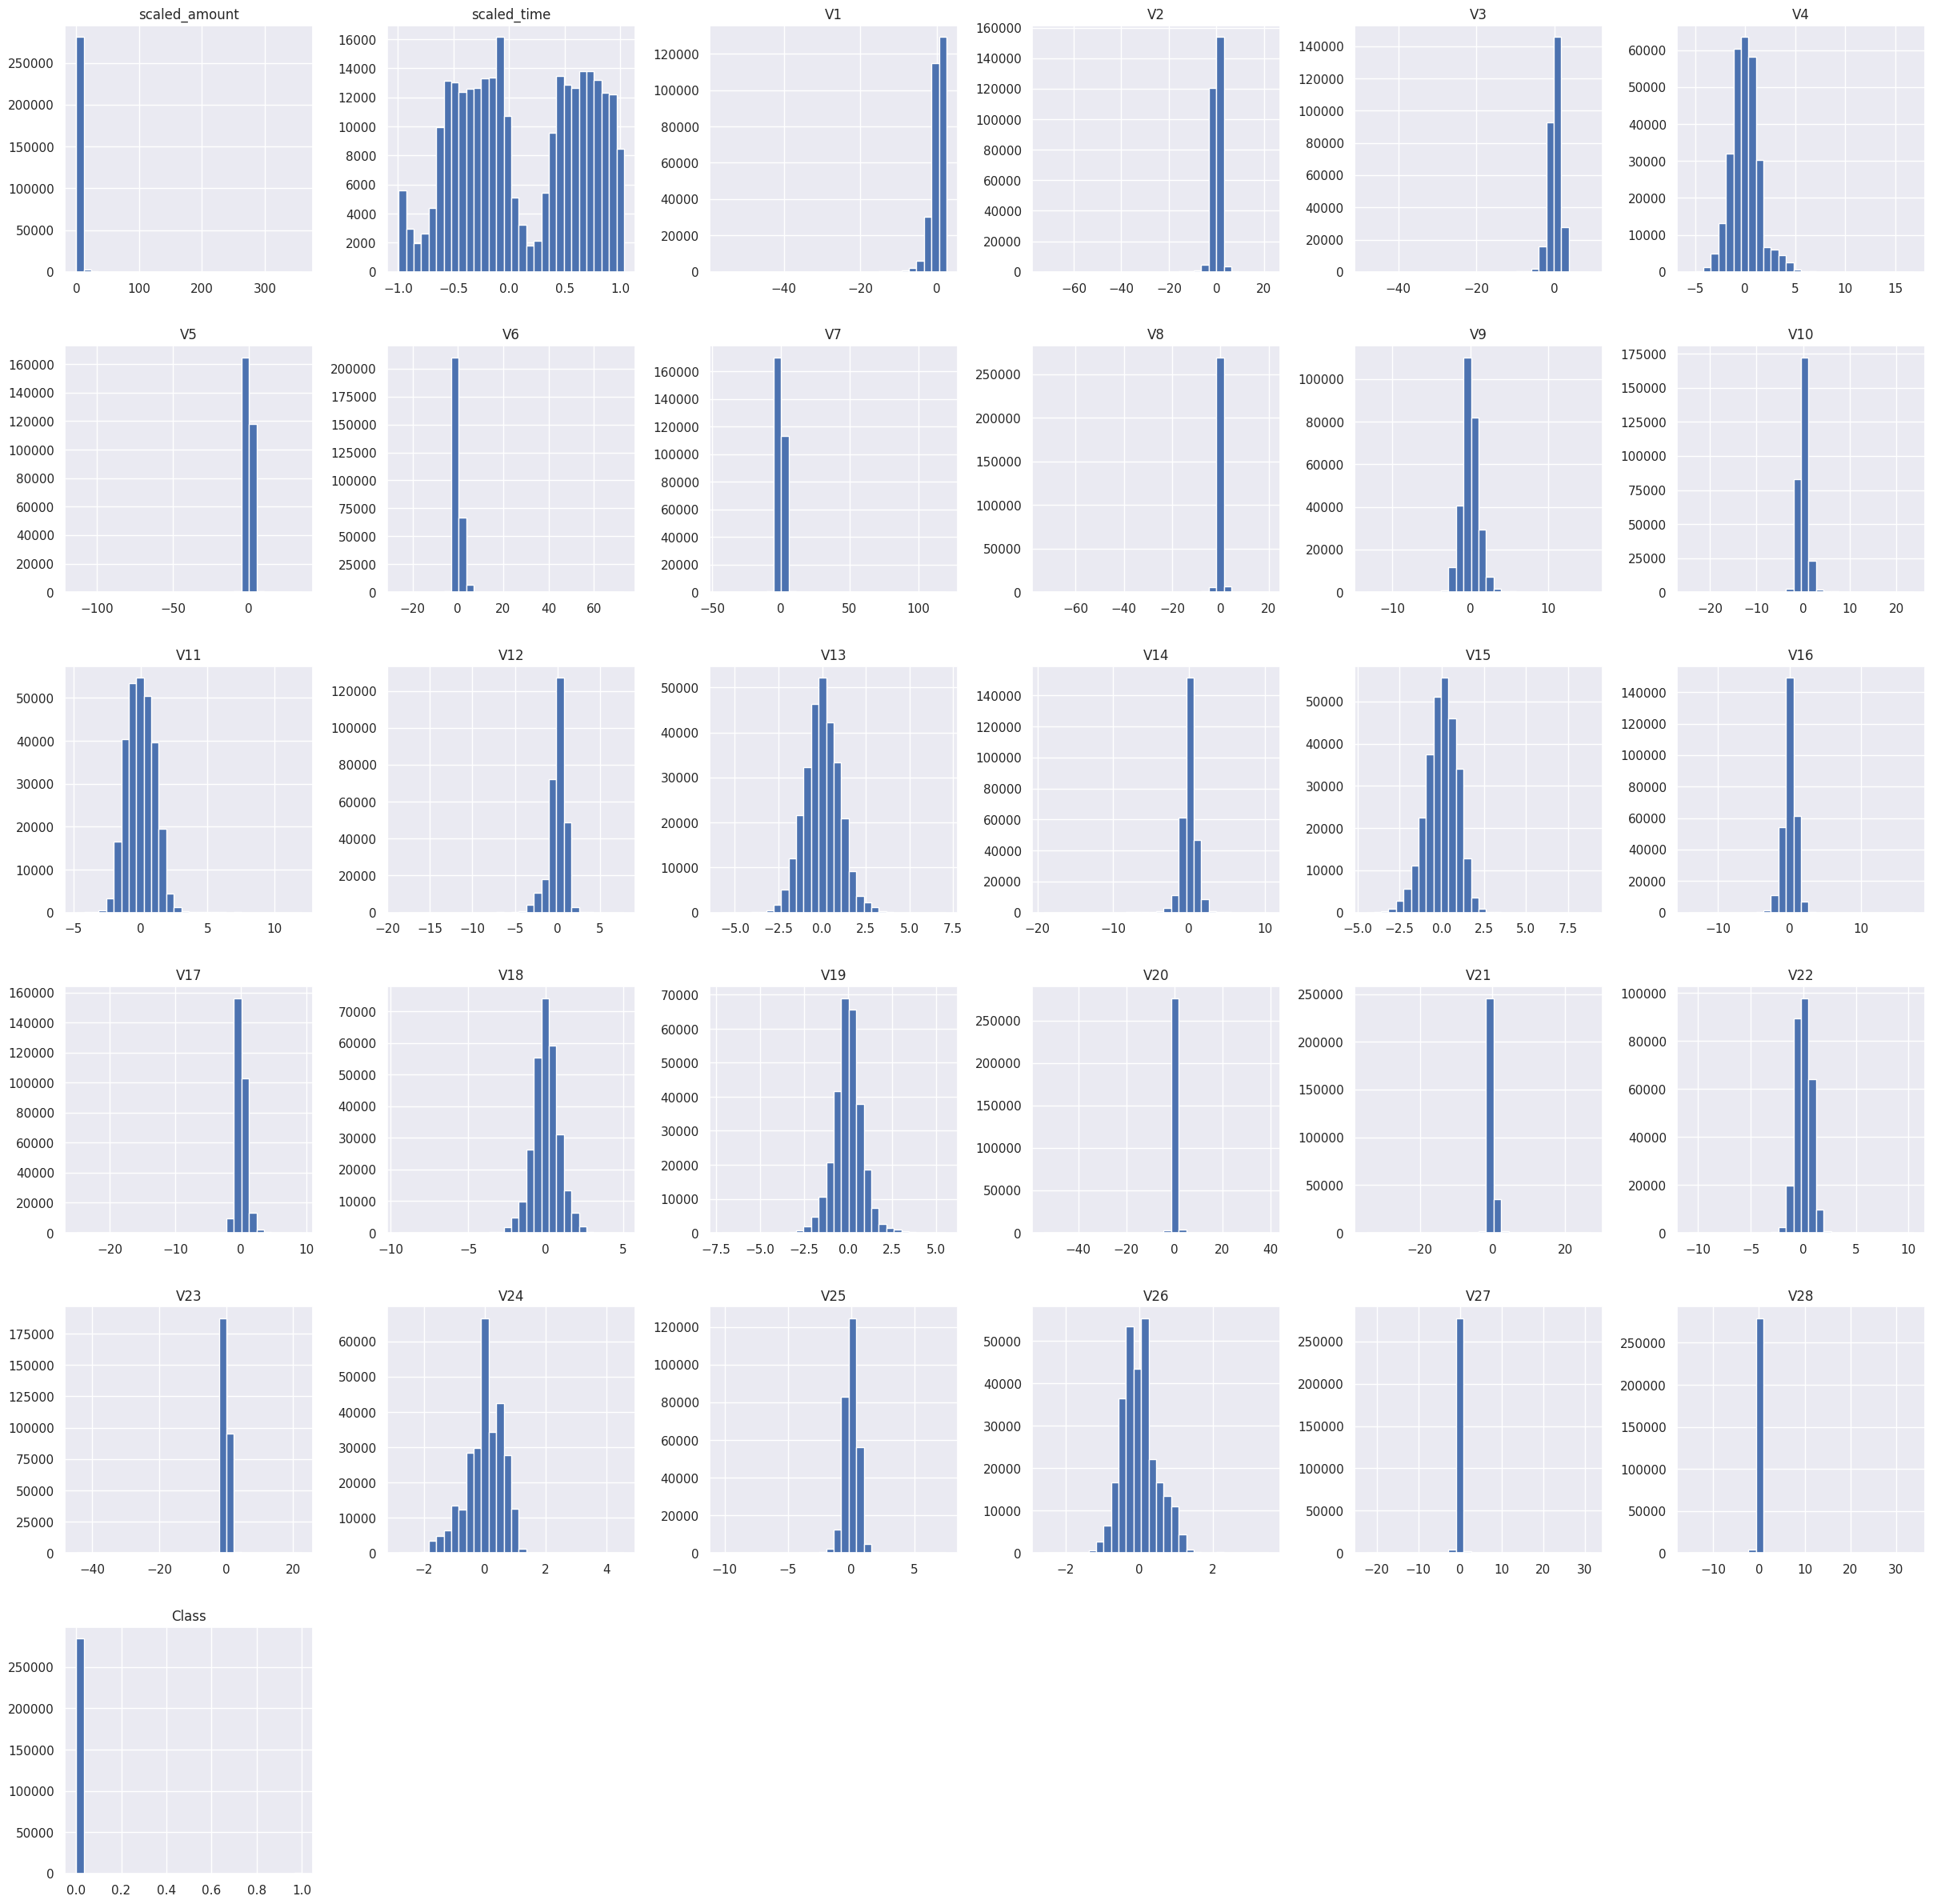

In [ ]:
df.hist(bins=30, figsize=(30, 30));

Data Frame Columns

In [ ]:
print (df.columns)

Index(['scaled_amount', 'scaled_time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6',
       'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16',
       'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26',
       'V27', 'V28', 'Class'],
      dtype='object')


Visualising Class Distribution

In [ ]:
def rank_class(class_fraud):
  if class_fraud == 0:
    return " not fraud"
  else:
    return "fraud"

Text(0.5, 1.0, 'Class Distribution')

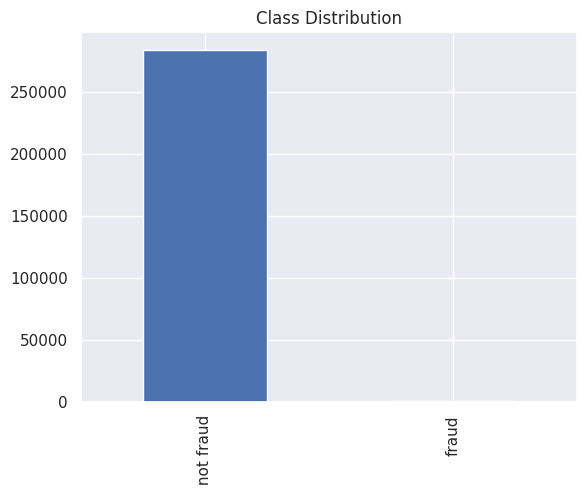

In [ ]:
df["Class"].apply(rank_class).value_counts().plot(kind = "bar")
plt.title('Class Distribution')

Checking For Null Values

In [ ]:
df.isnull().sum().max()

0

Dataset Information after Scaling

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   scaled_amount  284807 non-null  float64
 1   scaled_time    284807 non-null  float64
 2   V1             284807 non-null  float64
 3   V2             284807 non-null  float64
 4   V3             284807 non-null  float64
 5   V4             284807 non-null  float64
 6   V5             284807 non-null  float64
 7   V6             284807 non-null  float64
 8   V7             284807 non-null  float64
 9   V8             284807 non-null  float64
 10  V9             284807 non-null  float64
 11  V10            284807 non-null  float64
 12  V11            284807 non-null  float64
 13  V12            284807 non-null  float64
 14  V13            284807 non-null  float64
 15  V14            284807 non-null  float64
 16  V15            284807 non-null  float64
 17  V16            284807 non-nul

Describe Dataset

In [ ]:
df.describe()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,284807.000000,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,0.927124,0.118914,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,...,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,0.001727
std,3.495006,0.557903,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527
min,-0.307413,-0.994983,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,-0.229162,-0.358210,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000
50%,0.000000,0.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000
75%,0.770838,0.641790,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000
max,358.683155,1.035022,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000


Target Variable Class

In [ ]:
class_names = {0:'Not Fraud', 1:'Fraud'}
print(df.Class.value_counts().rename(index = class_names))

Not Fraud    284315
Fraud           492
Name: Class, dtype: int64


Splitting the Dataset into Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, test_size=0.30, random_state=1)
print("Length of X_train is: {X_train}".format(X_train = len(X_train)))
print("Length of X_test is: {X_test}".format(X_test = len(X_test)))
print("Length of y_train is: {y_train}".format(y_train = len(y_train)))
print("Length of y_test is: {y_test}".format(y_test = len(y_test)))

Length of X_train is: 199364
Length of X_test is: 85443
Length of y_train is: 199364
Length of y_test is: 85443


In [ ]:
#df=df.interpolate()
df = df.dropna()

Visualising  The Test Results

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
dt.score(X_test,y_test)


0.999204147794436

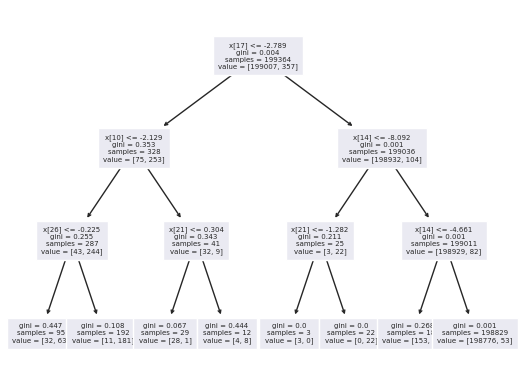

In [ ]:
from sqlalchemy import label
from sklearn import tree
import matplotlib.pyplot as plt
plt.Figure(figsize=(30,10),facecolor='k')
a=tree.plot_tree(dt,fontsize=5)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[85283    25]
 [   43    92]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.79      0.68      0.73       135

    accuracy                           1.00     85443
   macro avg       0.89      0.84      0.86     85443
weighted avg       1.00      1.00      1.00     85443



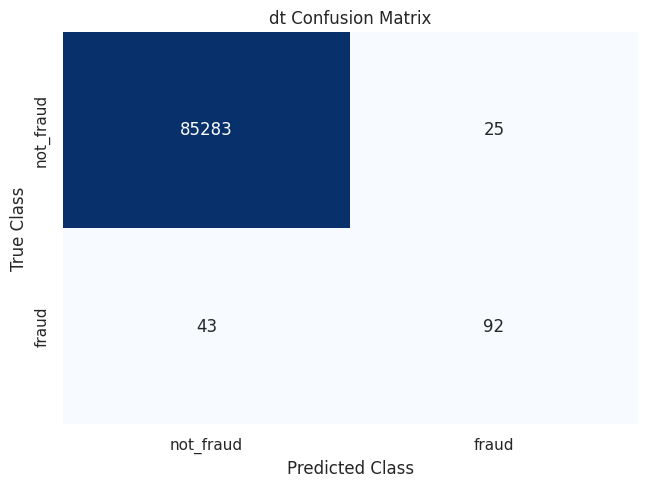

In [ ]:
class_names = ['not_fraud', 'fraud']
matrix = confusion_matrix(y_test, y_pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("dt Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [ ]:
df = df.dropna()

In [ ]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
rf.score(X_test,y_test)

0.9994850368081645

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[85296    12]
 [   32   103]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.90      0.76      0.82       135

    accuracy                           1.00     85443
   macro avg       0.95      0.88      0.91     85443
weighted avg       1.00      1.00      1.00     85443



Visualising The Confussion Matrix 

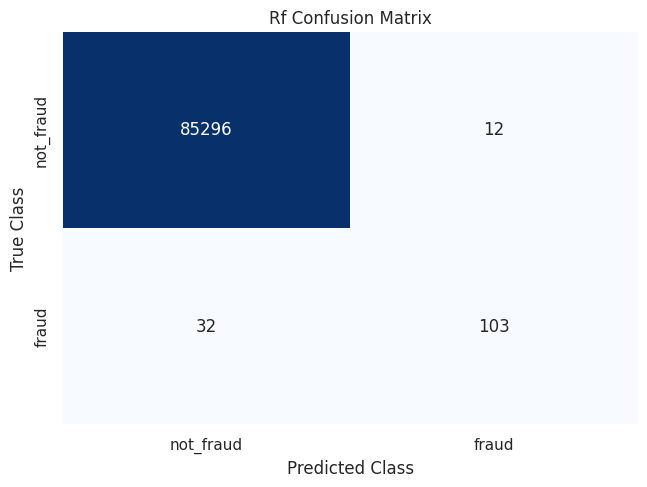

In [ ]:
class_names = ['not_fraud', 'fraud']
matrix = confusion_matrix(y_test, y_pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Rf Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

Training Gradient Boosting Model on Training Set and Predicting The Test Set Results

In [ ]:
from sklearn import ensemble
gb=ensemble.GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred= gb.predict(X_test)
gb.score(X_test,y_test)

0.9985955549313578

Visualising The Test Results

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[85294    14]
 [  106    29]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.67      0.21      0.33       135

    accuracy                           1.00     85443
   macro avg       0.84      0.61      0.66     85443
weighted avg       1.00      1.00      1.00     85443



Visualising The Confussion Matrix

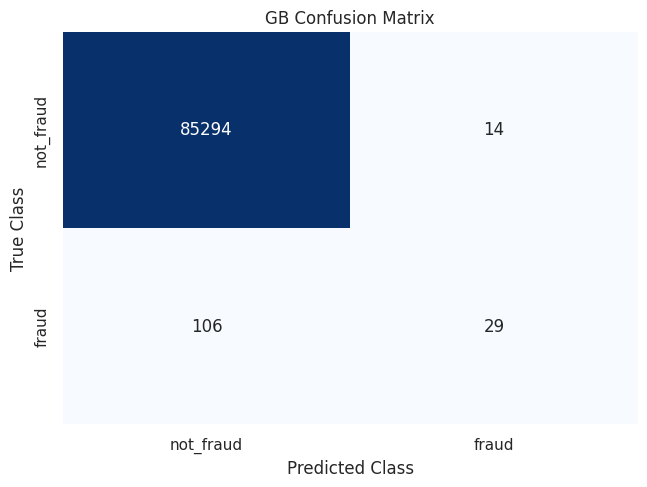

In [ ]:
class_names = ['not_fraud', 'fraud']
matrix = confusion_matrix(y_test, y_pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("GB Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

SMOTE Model Over Sampling

In [ ]:
from imblearn.over_sampling._smote.base import SMOTEN
from imblearn.over_sampling import SMOTE
smote = SMOTE()

Fitting The SMOTE Model Training

In [ ]:
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'), y_train)

In [ ]:
from collections import Counter
print("Before SMOTE :", Counter(y_train))
print("After SMOTE :", Counter(y_train_smote))

Before SMOTE : Counter({0: 199007, 1: 357})
After SMOTE : Counter({0: 199007, 1: 199007})


Visualising Class Distribution After SMOTE

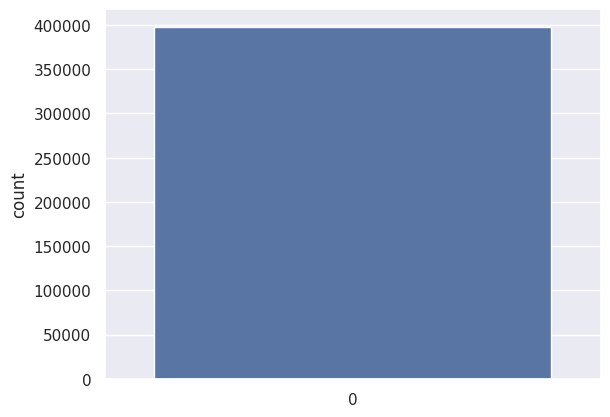

In [ ]:
sns.countplot(y_train_smote);

Training Random Forest SMOTE Model on Training Set and Predicting The Test Set Results

In [ ]:
from sklearn import ensemble
rfs = ensemble.RandomForestClassifier()
rfs.fit(X_train_smote,y_train_smote)
y_pred = rfs.predict(X_test)
rfs.score(X_test,y_test)

0.9994733330992591

Visualising The Test Results

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[85290    18]
 [   27   108]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.86      0.80      0.83       135

    accuracy                           1.00     85443
   macro avg       0.93      0.90      0.91     85443
weighted avg       1.00      1.00      1.00     85443



Visualising The Confussion Matrix

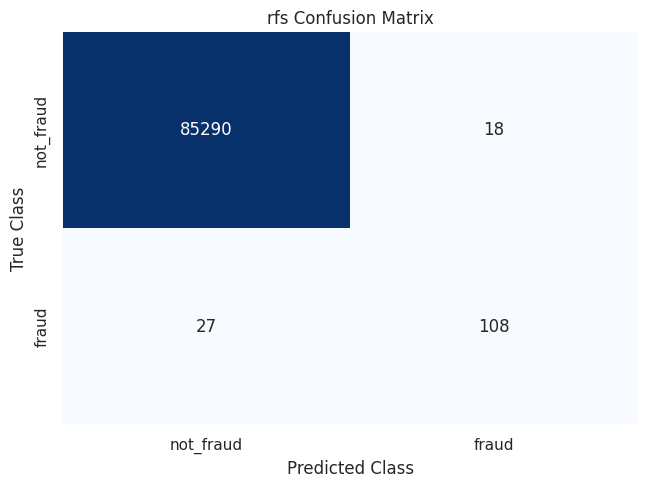

In [ ]:
class_names = ['not_fraud', 'fraud']
matrix = confusion_matrix(y_test, y_pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("rfs Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

Training Gradient Boosting Model SMOTE on Training Set and Predicting The Test Set Results

In [ ]:
from sklearn import ensemble
gbs=ensemble.GradientBoostingClassifier()
gbs.fit(X_train_smote,y_train_smote)
gbs.score(X_test,y_test)
y_pred= gbs.predict(X_test)
gbs.score(X_test,y_test)

0.9951429608042789

Visualising The Test Results

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[84914   394]
 [   21   114]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.22      0.84      0.35       135

    accuracy                           1.00     85443
   macro avg       0.61      0.92      0.68     85443
weighted avg       1.00      1.00      1.00     85443



Visualising The Confussion Matrix

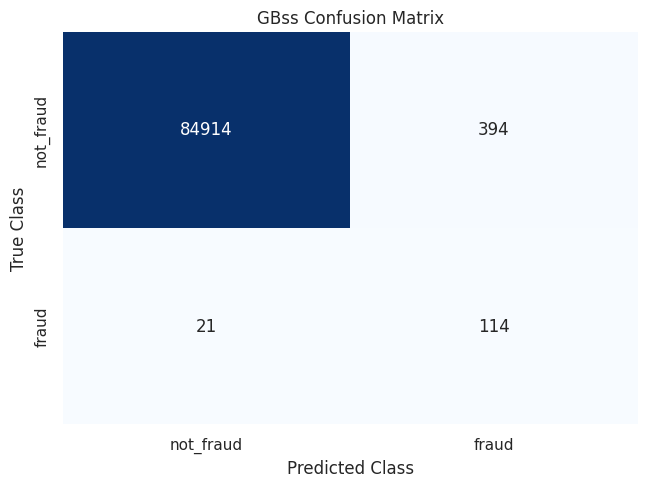

In [ ]:
class_names = ['not_fraud', 'fraud']
matrix = confusion_matrix(y_test, y_pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("GBss Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

Training Gradient Boosting Model SMOTE Fine Tuning on Training Set and Predicting The Test Set Results

In [ ]:
from sklearn import ensemble
gbsf=ensemble.GradientBoostingClassifier(n_estimators=10, max_depth=2, learning_rate=1.0)
gbsf.fit(X_train_smote,y_train_smote)
gbsf.score(X_test,y_test)
y_pred= gbsf.predict(X_test)
gbsf.score(X_test,y_test)

0.9875823648514214

Visualising The Test Results

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[84269  1039]
 [   22   113]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85308
           1       0.10      0.84      0.18       135

    accuracy                           0.99     85443
   macro avg       0.55      0.91      0.58     85443
weighted avg       1.00      0.99      0.99     85443



Visualising The Confussion Matrix

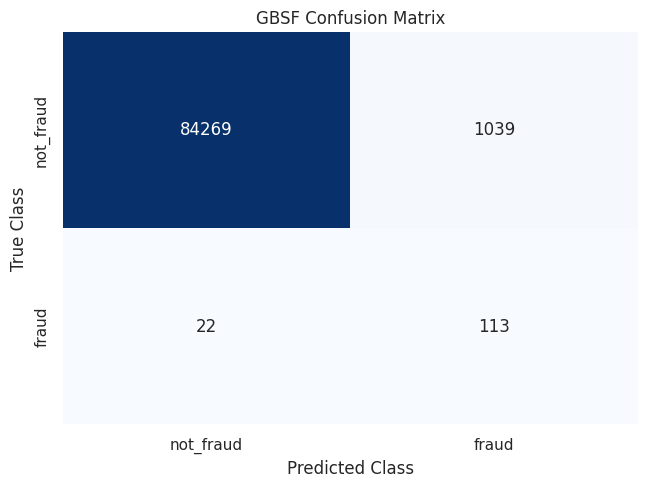

In [ ]:
class_names = ['not_fraud', 'fraud']
matrix = confusion_matrix(y_test, y_pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("GBSF Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [ ]:
from imblearn.under_sampling import  RandomUnderSampler
randomundersampler = RandomUnderSampler()

In [ ]:
X_train_under, y_train_under = randomundersampler.fit_resample(X_train.astype('float'), y_train)

In [ ]:
from collections import Counter
print("Before RandomUnderSampler :", Counter(y_train))
print("After RandomUnderSampler :", Counter(y_train_under))

Before RandomUnderSampler : Counter({0: 199007, 1: 357})
After RandomUnderSampler : Counter({0: 357, 1: 357})


Visualising Class Distribution After Under Sampling

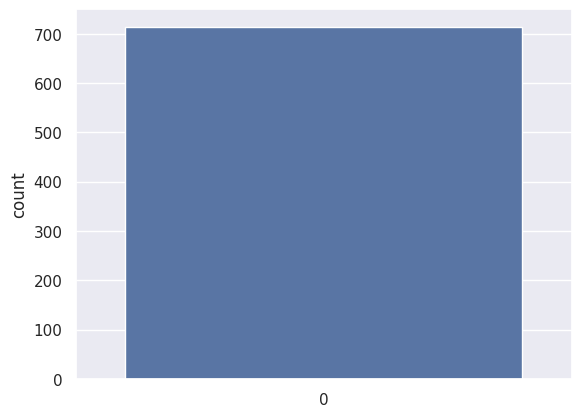

In [ ]:
sns.countplot(y_train_under);

Training Random Forest Under Sampling Model on Training Set and Predicting The Test Set Results

In [ ]:
from sklearn import ensemble
rfu = ensemble.RandomForestClassifier()
rfu.fit(X_train_under,y_train_under)
y_pred = rfu.predict(X_test)
rfu.score(X_test,y_test)

0.9798111021382676

Visualising The Test Results

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[83598  1710]
 [   15   120]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85308
           1       0.07      0.89      0.12       135

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.56     85443
weighted avg       1.00      0.98      0.99     85443



Visualising The Confussion Matrix

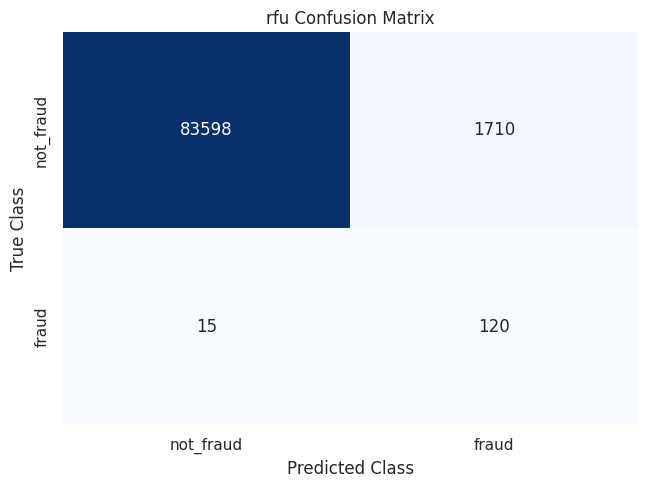

In [ ]:
class_names = ['not_fraud', 'fraud']
matrix = confusion_matrix(y_test, y_pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("rfu Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()


Training Gradient Boosting Model Under Sampling on Training Set and Predicting The Test Set Results

In [ ]:
from sklearn import ensemble
gbu=ensemble.GradientBoostingClassifier()
gbu.fit(X_train_under,y_train_under)
gbu.score(X_test,y_test)
y_pred= gbu.predict(X_test)
gbu.score(X_test,y_test)

0.9624896129583465

Visualising The Test Results

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[82115  3193]
 [   12   123]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85308
           1       0.04      0.91      0.07       135

    accuracy                           0.96     85443
   macro avg       0.52      0.94      0.53     85443
weighted avg       1.00      0.96      0.98     85443



Visualising The Confussion Matrix

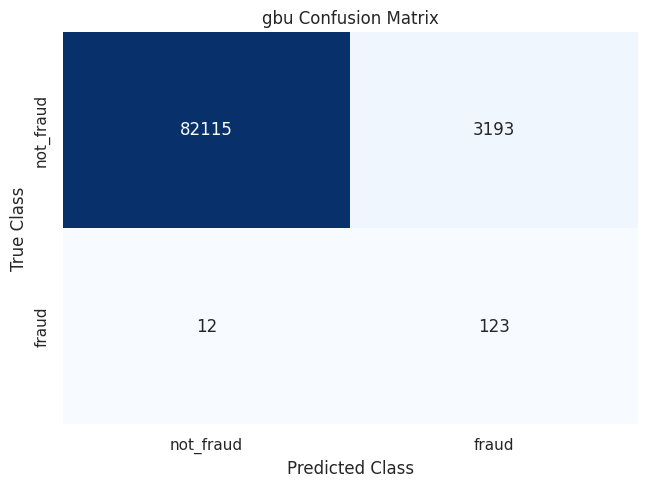

In [ ]:
class_names = ['not_fraud', 'fraud']
matrix = confusion_matrix(y_test, y_pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("gbu Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

ROC Model Evaluation Function

ROC AUC = 0.892
ROC AUC = 0.935
ROC AUC = 0.415
ROC AUC = 0.975
ROC AUC = 0.979
ROC AUC = 0.978
ROC AUC = 0.983
ROC AUC = 0.977


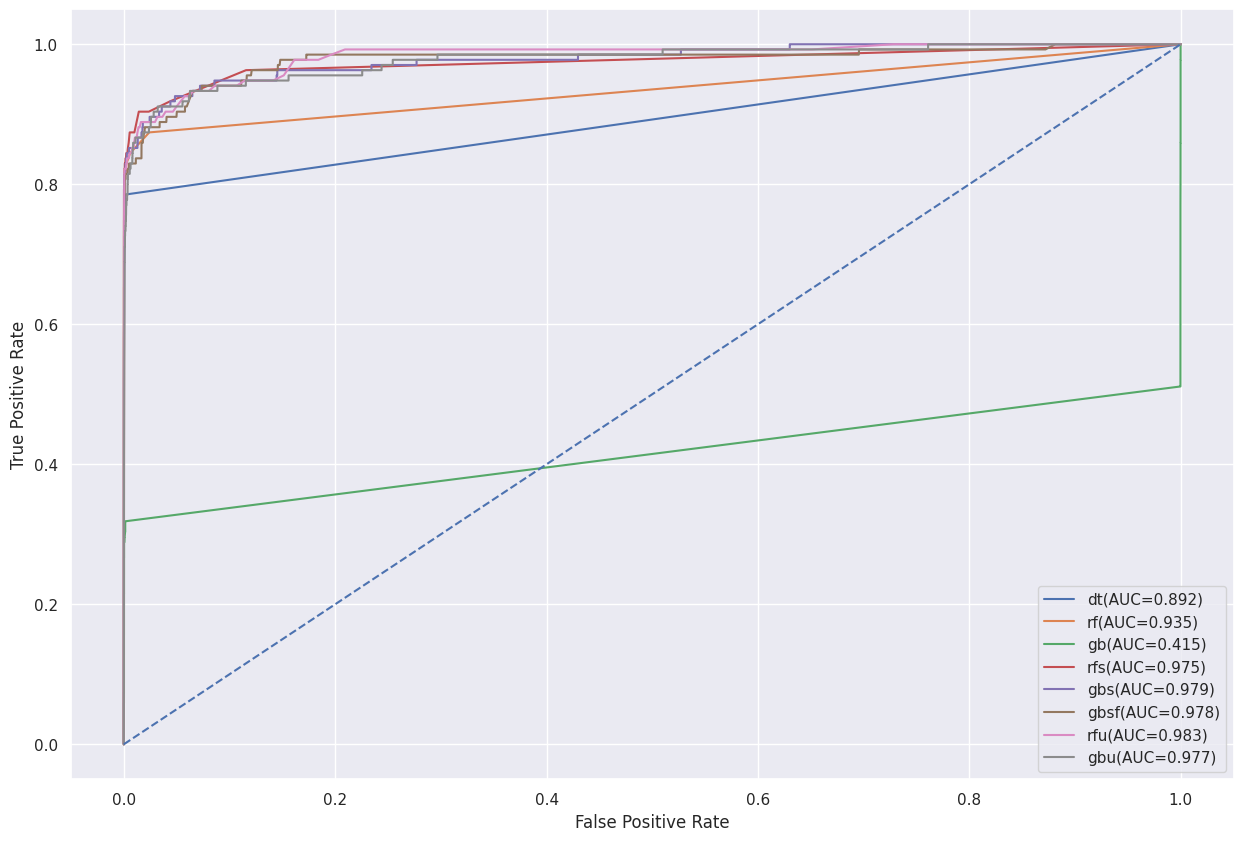

In [ ]:
from sklearn.metrics import roc_curve, auc
from IPython.core.pylabtools import figsize
plt.figure(num=1, figsize=(15 ,10))


def plot_roc(X_test,y_test, models):
  for name,model in models.items():
    if hasattr(model,'decision_function'):
      probs=model.decision_function(X_test)
    elif hasattr(model,'predict_proba'):
      probs=model.predict_proba(X_test)[:,1]
    fpr,tpr,threshold=roc_curve(y_test,probs)
    roc_auc=auc(fpr,tpr)
    print('ROC AUC = %0.3f'%roc_auc)
    plt.plot(fpr,tpr,label='%s(AUC=%0.3f)'%(name,roc_auc))

models={'dt':dt,'rf':rf,'gb':gb,'rfs':rfs,'gbs':gbs,'gbsf':gbsf, 'rfu':rfu, 'gbu':gbu}
plot_roc(X_test,y_test,models)

plt.plot([0,1],[0,1],'b--')
#plt.xlim([0,1])
#plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


ROC AUC = 0.935
ROC AUC = 0.415
ROC AUC = 0.975
ROC AUC = 0.979
ROC AUC = 0.978
ROC AUC = 0.983
ROC AUC = 0.977


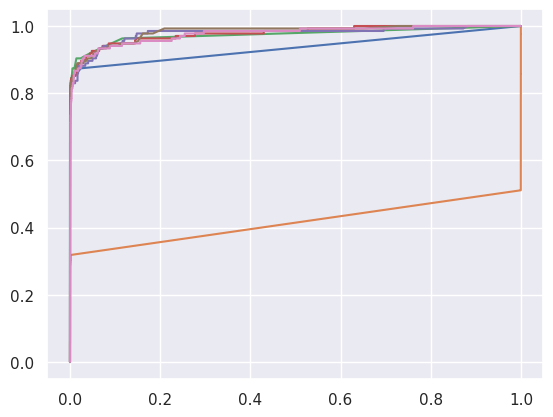

In [ ]:
models={'rf':rf,'gb':gb,'rfs':rfs,'gbs':gbs,'gbsf':gbsf, 'rfu':rfu, 'gbu':gbu}
plot_roc(X_test,y_test,models)

In [ ]:
r_probs = [0 for _ in range (len(y_test))]
rf_probs = rf.predict_proba(X_test)
gb_probs = gb.predict_proba(X_test)
rfs_probs = rfs.predict_proba(X_test)
gbs_probs = gbs.predict_proba(X_test)
rfu_probs = rfu.predict_proba(X_test)
gbu_probs = gbu.predict_proba(X_test)

In [ ]:
rf_probs =rf_probs[:,1]
gb_probs =gb_probs[:,1]
rfs_probs=rfs_probs[:,1]
gbs_probs=gbs_probs[:,1]
rfu_probs=rfu_probs[:,1]
gbu_probs=gbu_probs[:,1]

In [ ]:
from sklearn.metrics import roc_auc_score
r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
gb_auc = roc_auc_score(y_test, gb_probs)
rfs_auc = roc_auc_score(y_test, rfs_probs)
gbs_auc = roc_auc_score(y_test, gbs_probs)
rfu_auc = roc_auc_score(y_test, rfu_probs)
gbu_auc = roc_auc_score(y_test, gbu_probs)

In [ ]:
print("Randon Prediction: AUROC = %.3f" %(r_auc))
print("Randon Forest Prediction: AUROC = %.3f" %(rf_auc))
print("Gradient Boosting Prediction: AUROC = %.3f" %(gb_auc))
print("Randon Forest Smote Prediction: AUROC = %.3f" %(rfs_auc))
print("Gradient Boosting Smote Prediction: AUROC = %.3f" %(gbs_auc))
print("Randon Forest Under Prediction: AUROC = %.3f" %(rfu_auc))
print("Gradient Boosting Under Prediction: AUROC = %.3f" %(gbu_auc))

Randon Prediction: AUROC = 0.500
Randon Forest Prediction: AUROC = 0.935
Gradient Boosting Prediction: AUROC = 0.415
Randon Forest Smote Prediction: AUROC = 0.975
Gradient Boosting Smote Prediction: AUROC = 0.979
Randon Forest Under Prediction: AUROC = 0.983
Gradient Boosting Under Prediction: AUROC = 0.977


In [ ]:
from sklearn.metrics import roc_curve
r_fpr , r_tpr ,_= roc_curve (y_test, r_probs)
rf_fpr , rf_tpr ,_= roc_curve (y_test, rf_probs)
gb_fpr , gb_tpr ,_= roc_curve (y_test, gb_probs)
rfs_fpr , rfs_tpr ,_= roc_curve (y_test, rfs_probs)
gbs_fpr , gbs_tpr ,_= roc_curve (y_test, gbs_probs)
rfu_fpr , rfu_tpr ,_= roc_curve (y_test, rfu_probs)
gbu_fpr , gbu_tpr ,_= roc_curve (y_test, gbu_probs)

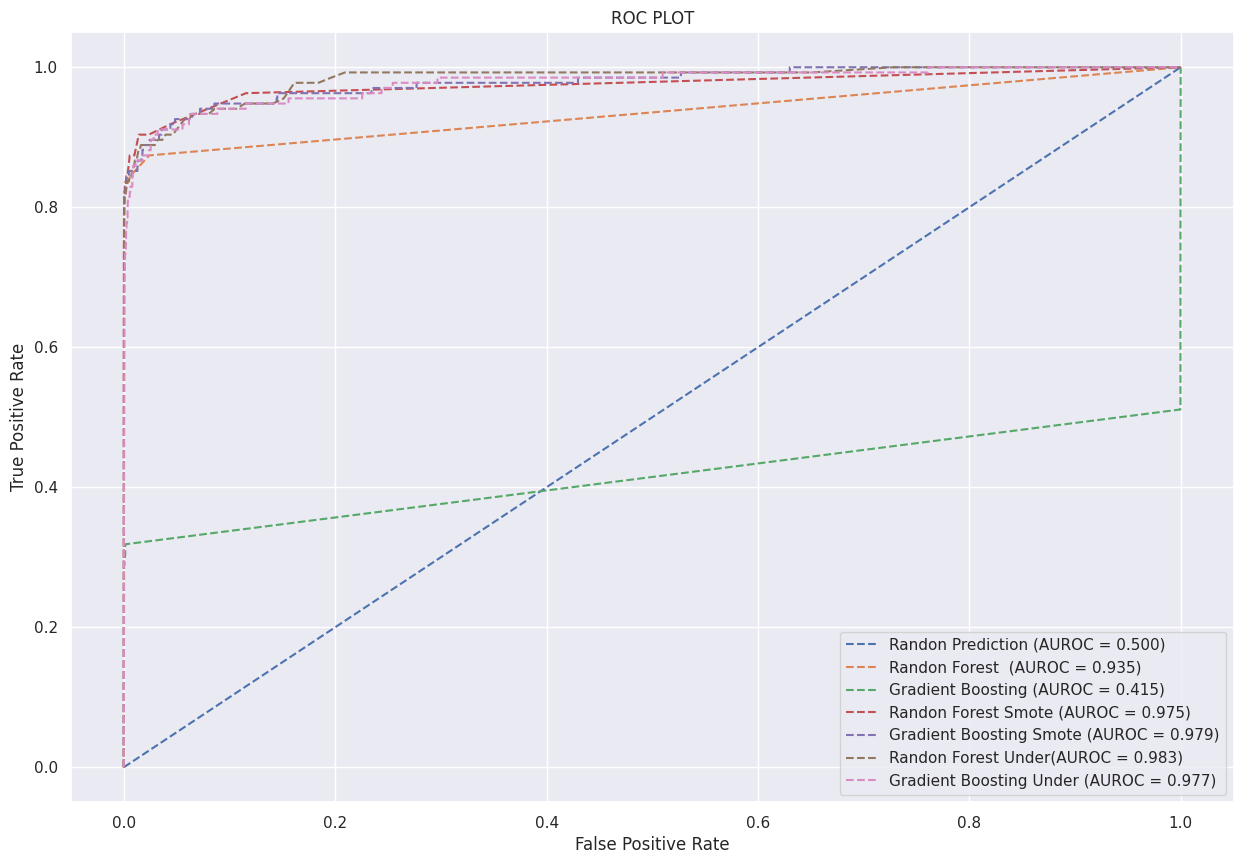

In [ ]:
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
plt.figure(num=1, figsize=(15 ,10))
plt.plot(r_fpr, r_tpr, linestyle = '--', label = 'Randon Prediction (AUROC = %.3f)' %(r_auc))
plt.plot(rf_fpr, rf_tpr, linestyle = '--', label = 'Randon Forest  (AUROC = %.3f)' %(rf_auc))
plt.plot(gb_fpr, gb_tpr, linestyle = '--', label = 'Gradient Boosting (AUROC = %.3f)' %(gb_auc))
plt.plot(rfs_fpr, rfs_tpr, linestyle = '--', label = 'Randon Forest Smote (AUROC = %.3f)' %(rfs_auc))
plt.plot(gbs_fpr, gbs_tpr, linestyle = '--', label = 'Gradient Boosting Smote (AUROC = %.3f)' %(gbs_auc))
plt.plot(rfu_fpr, rfu_tpr, linestyle = '--', label = 'Randon Forest Under(AUROC = %.3f)' %(rfu_auc))
plt.plot(gbu_fpr, gbu_tpr, linestyle = '--', label = 'Gradient Boosting Under (AUROC = %.3f)' %(gbu_auc))
plt.title('ROC PLOT')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()